### What We’ll Learn

* How to detect objects by color (using HSV color space)
* How to detect shapes (using contours)
* How to draw boundaries around detected objects
* How to label shapes like circles, rectangles, triangles, etc.

##### Import and Read Image

In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [134]:
def show(img, cmap=None):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap)
    plt.axis('off')
    plt.show()

In [135]:
# Read the image
img = cv2.imread('./media/shapes.jpg')

if img is None:
    print('Error: Image not found, check the file path.')
    exit()

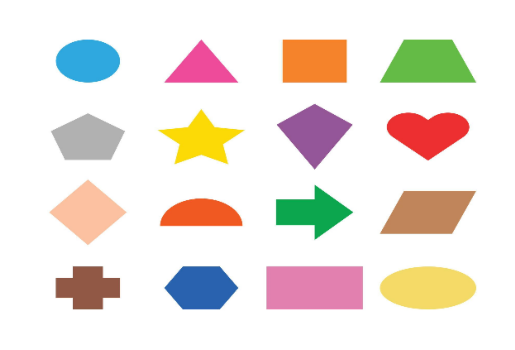

In [136]:
# Resize
img = cv2.resize(img, (600, 400))
show(img)

##### Convert to HSV and Create a Mask (for Color Detection)

In [137]:
# BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [138]:
# Define color range (example: detecting blue objects)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

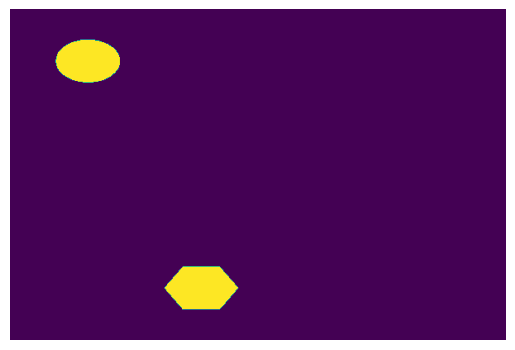

In [139]:
# Create a mask
mask = cv2.inRange(hsv, lower_blue, upper_blue)
show(mask)

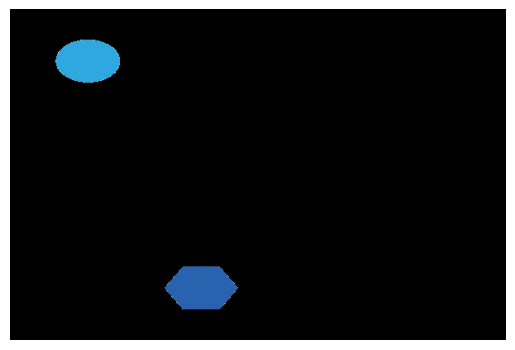

In [140]:
# Apply mask on the image
result = cv2.bitwise_and(img, img, mask=mask)
show(result)

##### Detect Shapes using Contours

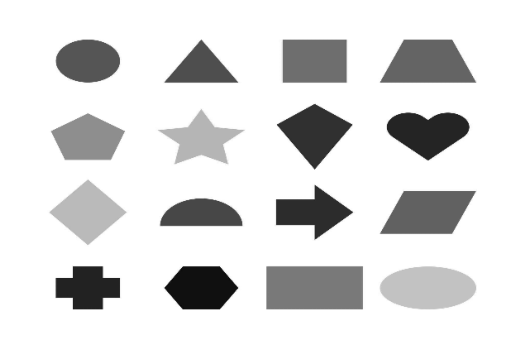

In [141]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray, cmap='gray')

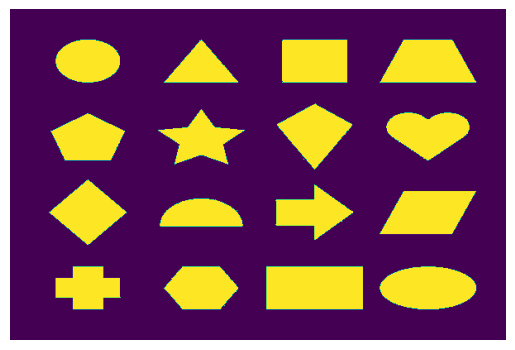

In [142]:
# Apply threshold
thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)[1]
show(thresh)

In [143]:
# Find contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

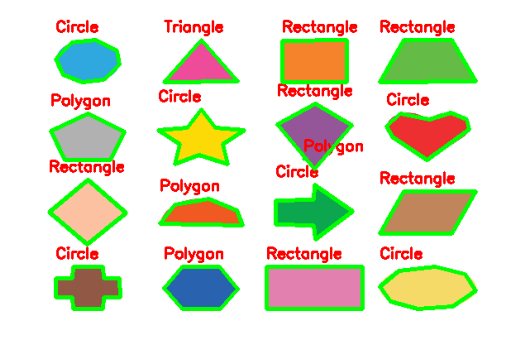

In [144]:
for contour in contours:
    # Approximate the shape
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    x, y, w, h = cv2.boundingRect(approx)

    #  # Detect the shape based on the number of corners
    if len(approx) == 3:
        shape_name = 'Triangle'
    elif len(approx) == 4:
        shape_name = 'Rectangle'
    elif len(approx) > 6:
        shape_name = 'Circle'
    else:
        shape_name = 'Polygon'

    # Draw contour and label
    cv2.drawContours(img, [approx], 0, (0, 255, 0), 3)
    cv2.putText(img, shape_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

show(img)